In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
os.chdir("/home/aditya/code_pen/edwiser_project")
#reading data set 

data =pd.read_csv("day.csv")

In [3]:
#Viewing few data 
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#droping instant variable as it  Record index
data.drop(axis =1  ,columns="instant" ,inplace =True)

In [5]:
# checking datatype
data.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Data visualisation 

In [6]:
temp =data.copy()

In [7]:
categorical_var =["season","yr","mnth","holiday","weekday","workingday","weathersit"] 

for i in categorical_var:
    temp[i] =temp[i].astype("object")

In [8]:
temp.dteday =pd.to_datetime(temp.dteday)
    
temp.set_index("dteday",drop=True ,inplace=True)

temp.columns.values

array(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'], dtype=object)

In [9]:
temp.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
temp.season = temp.replace([1,2,3,4],["Spring","Summer","Fall","Winter"])
temp.yr =temp.yr.replace([0,1],[2011,2012])
temp.holiday = temp.holiday.replace([0,1],["Working day","Holiday"])
temp.weathersit = temp.weathersit.replace([1,2,3,4],["Clear","Cloudy/Mist","Rain/Snow/Fog","Heavy/Rain/Snow/Fog"])

temp.temp = temp.temp * 39
temp.atemp = temp.atemp* 50
temp.windspeed = temp.windspeed * 67
temp.hum = temp.hum * 100




In [11]:
temp.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [12]:
temp.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,Spring,2011,1,Working day,6,0,Cloudy/Mist,13.422513,18.18125,80.5833,10.749882,331,654,985
2011-01-02,Spring,2011,1,Working day,0,0,Cloudy/Mist,14.175642,17.68695,69.6087,16.652113,131,670,801
2011-01-03,Spring,2011,1,Working day,1,1,Clear,7.658196,9.47025,43.7273,16.636703,120,1229,1349
2011-01-04,Spring,2011,1,Working day,2,1,Clear,7.800000,10.60610,59.0435,10.739832,108,1454,1562
2011-01-05,Spring,2011,1,Working day,3,1,Clear,8.851323,11.46350,43.6957,12.522300,82,1518,1600


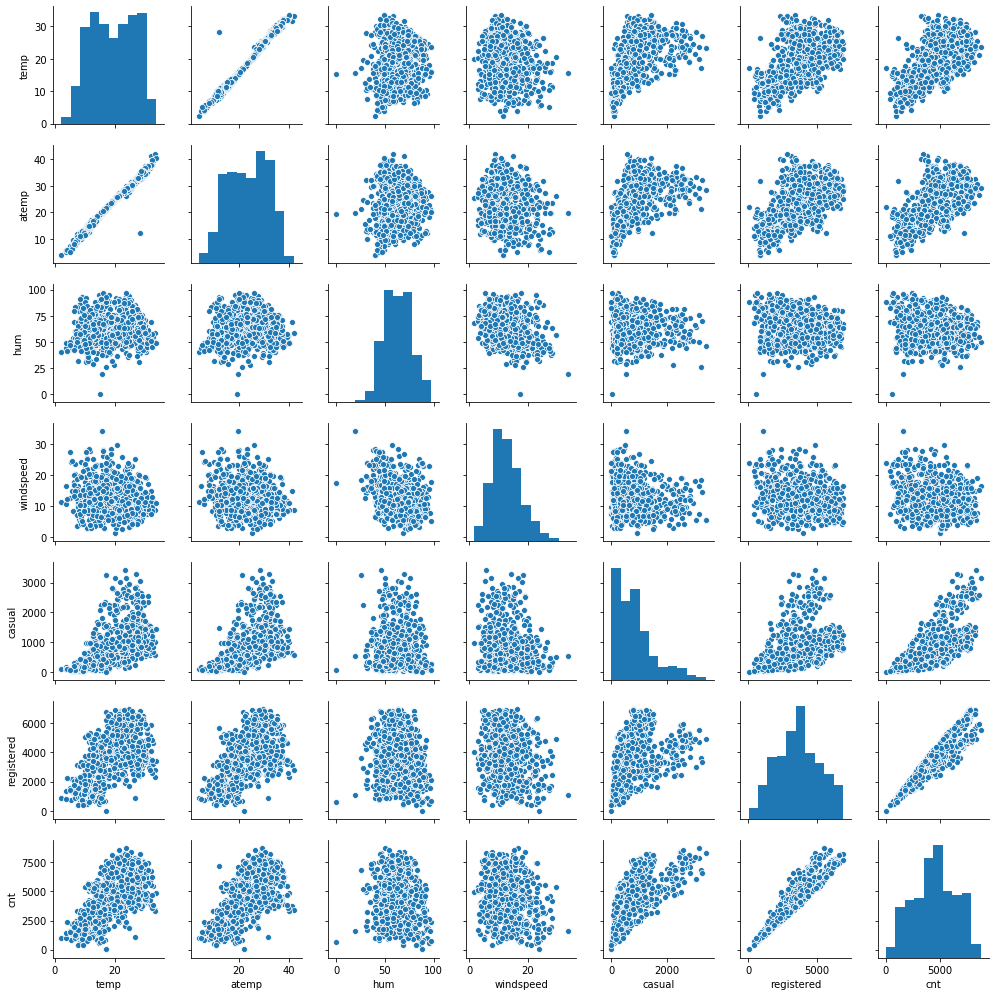

In [13]:
#pair plot for numeric variable analysis 
continous=['temp', 'atemp', 'hum', 'windspeed','casual','registered', 'cnt']
temp[continous]
sns.pairplot(data=temp[continous],height=2)
plt.show()

# Observation

1. temp and atemp highly posetively correlated 
2. cnt and registered is highly positevely  correlated 
3. cnt and casual is moderate positevely correlated 
4. casual is right skewed 
5. atemp is shows a moderate corelation toward cnt 
6. temp is shows a moderate corelation toward cnt 


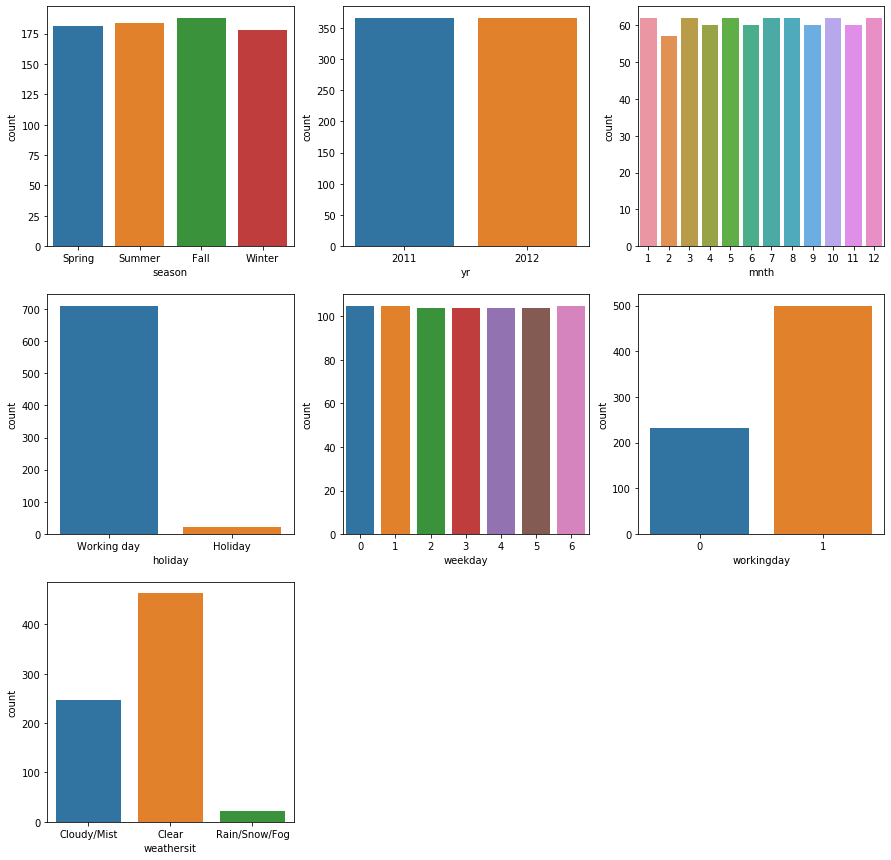

In [14]:
category =['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']
plt.figure(figsize=(15,15))
plt.subplot(331)
sns.countplot(temp.season)
plt.subplot(332)
sns.countplot(temp.yr)
plt.subplot(333)
sns.countplot(temp.mnth)
plt.subplot(334)
sns.countplot(temp.holiday)
plt.subplot(335)
sns.countplot(temp.weekday)
plt.subplot(336)
sns.countplot(temp.workingday)
plt.subplot(337)
sns.countplot(temp.weathersit)
plt.show()

# Observation 
1. number of holiday was less then working day 
2. there are very  few observation of Rain/snow/fog


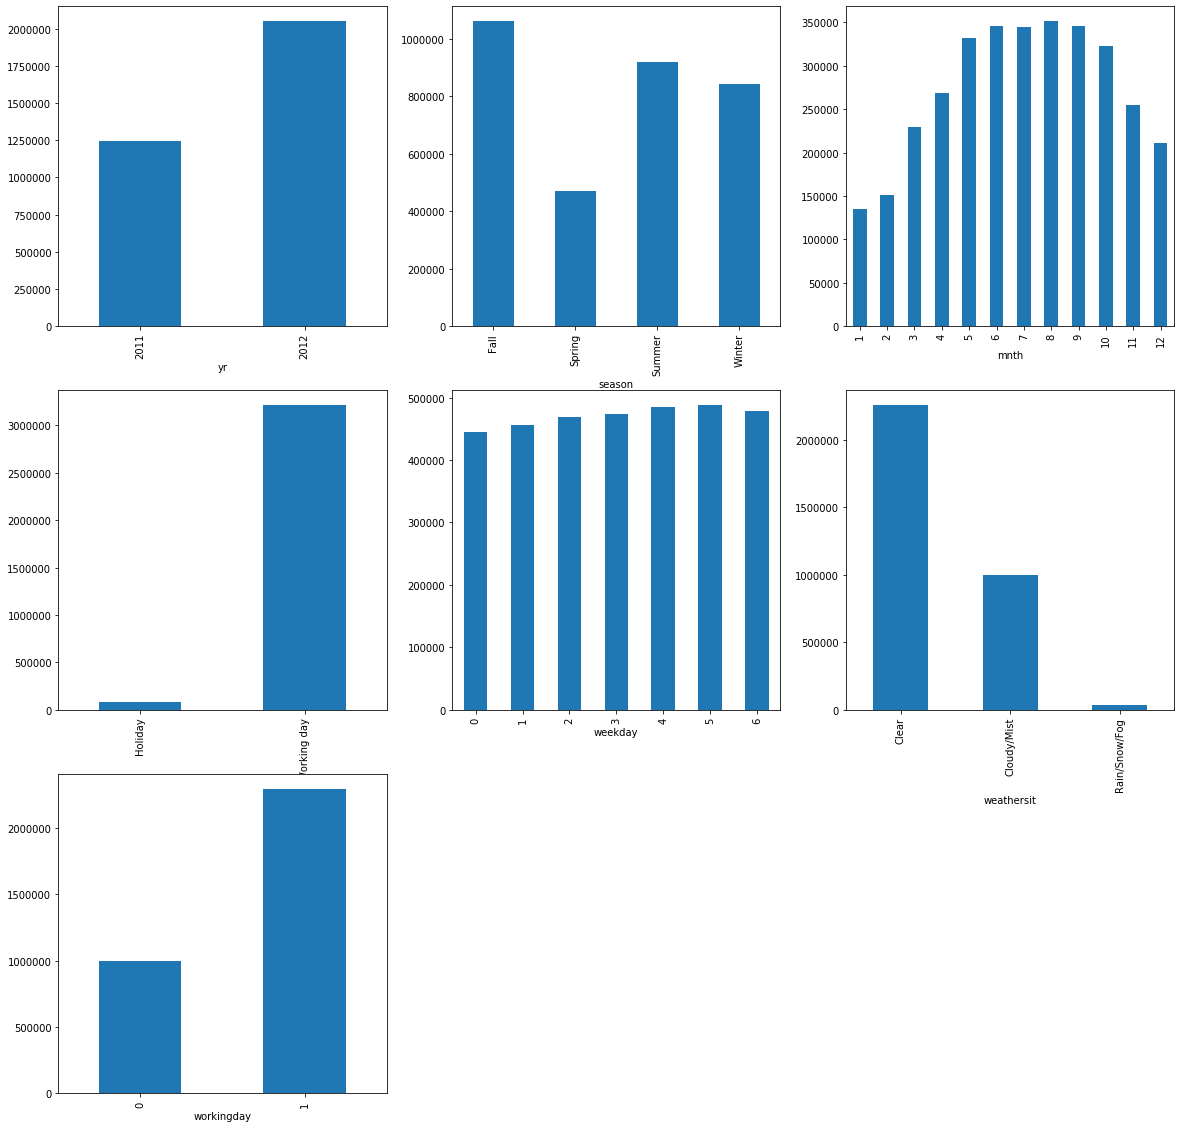

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(331)
temp.groupby(by='yr')['cnt'].sum().plot(kind='bar')
plt.subplot(332)
temp.groupby(by='season')['cnt'].sum().plot(kind='bar')
plt.subplot(333)
temp.groupby(by='mnth')['cnt'].sum().plot(kind='bar')
plt.subplot(334)
temp.groupby(by='holiday')['cnt'].sum().plot(kind='bar')
plt.subplot(335)
temp.groupby(by='weekday')['cnt'].sum().plot(kind='bar' )
plt.subplot(336)
temp.groupby(by='weathersit')['cnt'].sum().plot(kind='bar')
plt.subplot(337)
temp.groupby(by='workingday')['cnt'].sum().plot(kind='bar')
plt.show()



# Observations
1. On year 2012  more user rented bike  2011
2. On Fall season more number of people rented bike
3. On month 8 or August most no of bike where rented  amount =351194
4. On month 1 or january least number of bike where rented amoumt = 134933
5. On working day most number of bike where rented amount =3214244
6. On weekday 5  or friday most number of bike were reneted amount = 487790
7. On weekday 0 or sunday least number of bike where rented  amount =444027
8. On clear weather most number of bike was rented amount =2257952
9. On Rain/snow/fog   least number of bike was rented amount =37869
10. On holiday very few number of bike where rented compared to working day 

In [16]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Exploratory data analysis 

In [17]:


#dteday 
data.dteday =pd.to_datetime(data.dteday)

# date type can be split into day ,year ,months , weekday  .we all ready have year , months , weekdays 
#now we will extract day from date
#creating a dummy var day and assinging as np.nan
data.assign(day=np.nan)

for i in range(data.shape[0]):
    data.loc[i,"day"]=data.loc[i,'dteday'].strftime('%d')
    
#setting date as index     
data.set_index("dteday",drop=True ,inplace=True)


#season: Season (1:springer, 2:summer, 3:fall, 4:winter)

data.season = data.season.astype("object")
#yr: Year (0: 2011, 1:2012)

data.yr=data.yr.astype("object")
#mnth: Month (1 to 12)


data.mnth=data.mnth.astype("object")

#holiday: weather day is holiday or not (extracted fromHoliday Schedule)

data.holiday = data.holiday.astype("object")
#weekday: Day of the week [0 -6]

data.weekday =data.weekday.astype("object")
#workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
    

data.workingday =data.workingday.astype("object")

"""
weathersit: (extracted fromFreemeteo)
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
"""
# After checking the weather situation it was found that there is no category 4 in data 
data.weathersit =data.weathersit.astype("object") 

"""
temp: Normalized temperature in Celsius. The values are derived via
(t-t_min)/(t_max-t_min),
t_min=-8, t_max=+39 (only in hourly scale)
"""
# data type ok
data.temp.describe()

"""
atemp: Normalized feeling temperature in Celsius. The values are derived via
(t-t_min)/(t_maxt_min), t_min=-16, t_max=+50 (only in hourly scale)

"""
#data type ok 
data.atemp.describe()

"""
hum: Normalized humidity. The values are divided to 100 (max)
"""
# data type ok
data.hum.describe()

"""
windspeed: Normalized wind speed. The values are divided to 67 (max)

"""
# data type ok 
data.windspeed.describe()

#casual: count of casual users
#data type ok
data.casual.describe()

#registered: count of registered users
#data type ok
data.registered.describe()
#cnt: count of total rental bikes including both casual and registered
#data type ok
data.cnt.describe()
# day : day of month  in no (1 -31 )
data.day =data.day.astype("int")






In [18]:

data.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
day             int64
dtype: object

In [19]:
categorical_var =["season","yr","mnth","holiday","weekday","workingday","weathersit"]

In [20]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [21]:
#missing value analsis 

In [22]:
missingvalue =pd.DataFrame(data.isnull().sum())

In [23]:

missingvalue.assign(rows=missingvalue.index)
missingvalue.reset_index( inplace=True )

missingvalue.set_index('index' ,inplace=True)
missingvalue.rename(columns={0 :'count'} ,inplace=True)

# No  missing value 

In [24]:
missingvalue.head()

,count
index,
season,0
yr,0
mnth,0
holiday,0
weekday,0


In [25]:
# outlier analysis 
# on continous variable 

In [26]:
# selecting continous column only
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)

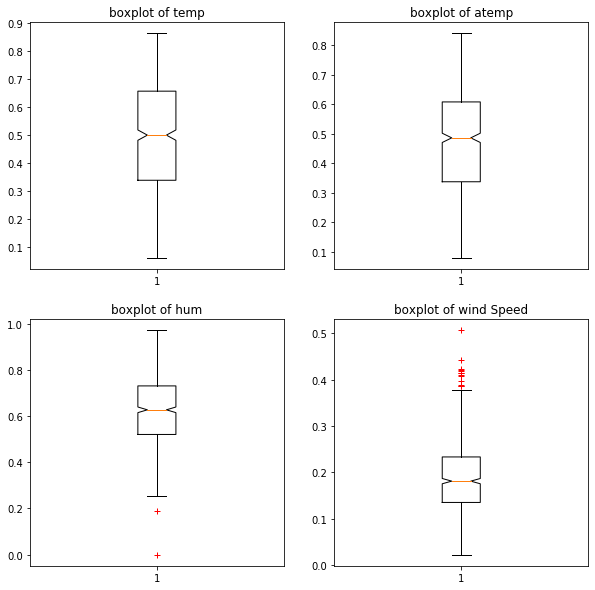

In [27]:

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.boxplot(newdf.temp,notch=True)
plt.title("boxplot of temp")
plt.subplot(222)
plt.boxplot(newdf.atemp,notch=True)
plt.title("boxplot of atemp")
plt.subplot(223)
plt.boxplot(newdf.hum,notch=True ,sym='r+')
plt.title("boxplot of hum")
plt.subplot(224)
plt.boxplot(newdf.windspeed,notch=True ,sym='r+')
plt.title("boxplot of wind Speed")
plt.show()

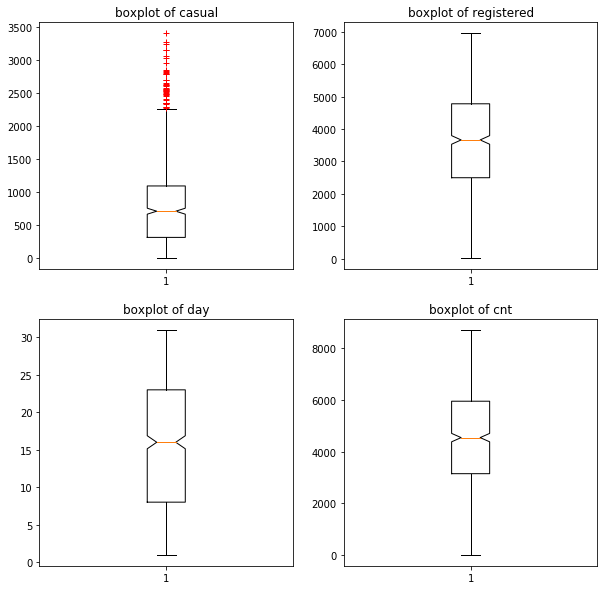

In [28]:


plt.figure(figsize=(10,10))
plt.subplot(221)
plt.boxplot(newdf.casual,notch=True ,sym='r+')
plt.title("boxplot of casual")
plt.subplot(222)
plt.boxplot(newdf.registered,notch=True ,sym='r+')
plt.title("boxplot of registered")
plt.subplot(223)
plt.boxplot(newdf.day,notch=True ,sym='r+')
plt.title("boxplot of day")
plt.subplot(224)
plt.boxplot(newdf.cnt,notch=True ,sym='r+')
plt.title("boxplot of cnt")
plt.show()

# We need to remove outlier from casual ,hum,wind speed

In [29]:
df = data.copy()

In [30]:
numeric_col = newdf.columns.values
# removing cnt target var  as we dont want to do outlier analysis on cnt
numeric_col=['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'day']


In [31]:
#filling nan to outliers 
# values below lower fense and upper fense are outlier 
for i in numeric_col:
    
    q75 ,q25 = np.percentile(data.loc[:,i] ,[75,25])
    
    iqr =q75-q25
    
    minimum = q25 -(1.5*iqr)
    maximum =q75+(1.5*iqr)
    
    print(i,"iqr",iqr,"mimimum",minimum,sep="  :")
    data.loc[data[i]<minimum ,i]=np.nan
    data.loc[data[i]>maximum ,i]=np.nan

temp  :iqr  :0.3183330000000001  :mimimum  :-0.14041600000000015
atemp  :iqr  :0.2707595000000001  :mimimum  :-0.06829675000000018
hum  :iqr  :0.21020850000000002  :mimimum  :0.20468725
windspeed  :iqr  :0.0982645  :mimimum  :-0.012446750000000034
casual  :iqr  :780.5  :mimimum  :-855.25
registered  :iqr  :2279.5  :mimimum  :-922.25
day  :iqr  :15.0  :mimimum  :-14.5


In [32]:
missingvalue=pd.DataFrame(data.isnull().sum())

In [33]:
missingvalue=missingvalue.sort_values(by=0 , ascending=False)
missingvalue.rename(columns={0:'count'},inplace=True)
missingvalue['count'] = (missingvalue['count']/data.shape[0])*100
missingvalue.rename(columns={'count':"percentage"},inplace=True)

In [34]:
missingvalue.head()

,percentage
casual,6.019152
windspeed,1.778386
hum,0.273598
season,0.000000
yr,0.000000


In [35]:
# imputing missing value 

In [36]:

"""

data.ix[33,'casual']

orignal value is 61

"""

#creating a missing value 

#data.ix[33,'casual']=np.nan

#mean imputation 

#data['casual']=data['casual'].fillna(data['casual'].mean())
"""
after mean imputation value of 
data.ix[33,'casual'] is 732

"""

#median imputation 

#data['casual']=data['casual'].fillna(data['casual'].median())


"""
after mean imputation value of 
data.ix[33,'casual'] is 675
"""

"\nafter mean imputation value of \ndata.ix[33,'casual'] is 675\n"

In [37]:

#knn  imputation 

for i in range(0,data.shape[1]):
    if(data.iloc[:,i].dtypes =="object"):
    #converting to float as categorical variable was allready coded 
        data.iloc[:,i]=data.iloc[:,i].astype("float64")
        


In [38]:
from fancyimpute import KNN

/home/aditya/.local/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [39]:
#using KNN imputation 
data = pd.DataFrame(KNN(k = 3).fit_transform(data), columns = data.columns,index=data.index)

Imputing row 1/731 with 0 missing, elapsed time: 0.245
Imputing row 101/731 with 0 missing, elapsed time: 0.246
Imputing row 201/731 with 0 missing, elapsed time: 0.247
Imputing row 301/731 with 0 missing, elapsed time: 0.248
Imputing row 401/731 with 0 missing, elapsed time: 0.248
Imputing row 501/731 with 0 missing, elapsed time: 0.249
Imputing row 601/731 with 0 missing, elapsed time: 0.251
Imputing row 701/731 with 0 missing, elapsed time: 0.252


In [40]:

# after knn imputation value is 54 which is quite close to 61  
#so selecting knn as imputation method  

In [41]:
# checking for missing value 

missing=pd.DataFrame(data.isnull().sum())
missing

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,0


In [42]:
categorical_var =["season","yr","mnth","holiday","weekday","workingday","weathersit"]
numeric_var =['temp' ,'atemp','hum','windspeed','casual','registered' ,'cnt' ,'day']
df=data.copy()

In [43]:
#  correlation analysis 
# on continous variable 

df_continous = data[numeric_var]



In [44]:
#calculaion correlation value 

corr_val=df_continous.corr()


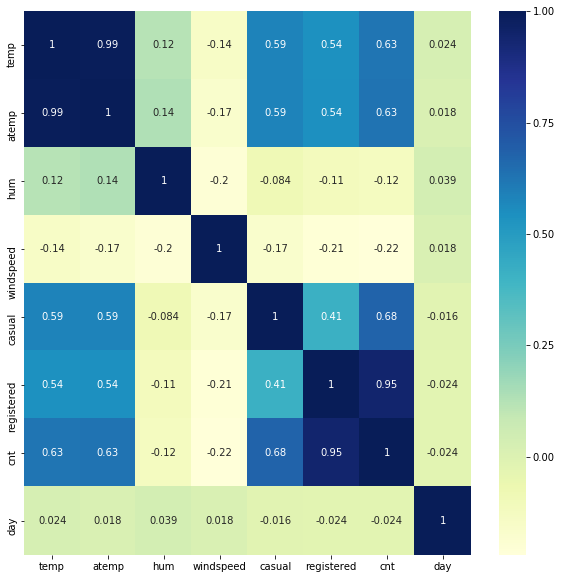

In [45]:
#plot heatmap 
f,ax =plt.subplots(figsize=(10,10))
sns.heatmap(corr_val ,cmap='YlGnBu',ax=ax,annot=True)

# temp is positevely correlated with atemp we should drop atemp


In [46]:
# removing atemp  from data 

data.drop(columns='atemp' ,inplace =True)
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'day'],
      dtype='object')

In [47]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,
2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2.0,0.344167,0.805833,0.160446,331.0,654.0,985.0,1.0
2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.363478,0.696087,0.248539,131.0,670.0,801.0,2.0
2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.196364,0.437273,0.248309,120.0,1229.0,1349.0,3.0
2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.200000,0.590435,0.160296,108.0,1454.0,1562.0,4.0
2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.226957,0.436957,0.186900,82.0,1518.0,1600.0,5.0


# Feature scaling 


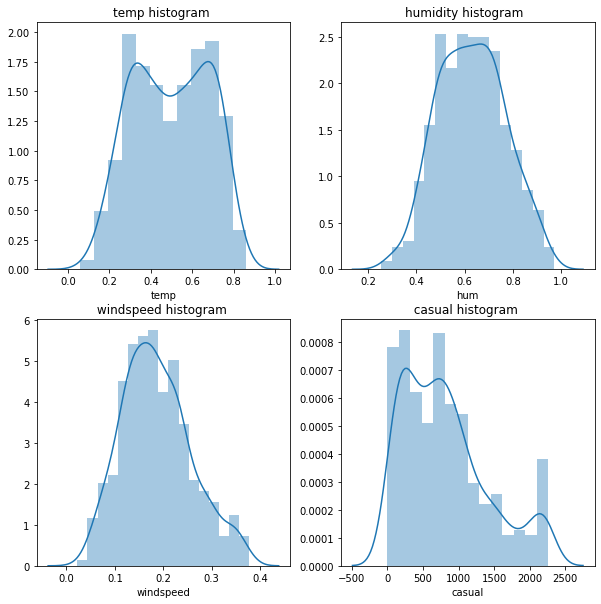

In [48]:
#Normality check
# ploting distribution plot 
%matplotlib inline  
numeric_var =['temp' ,'hum','windspeed','casual','registered'  ,'day']
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.distplot(data.temp, bins='auto')
plt.title("temp histogram ")
plt.subplot(222)
sns.distplot(data.hum, bins='auto')
plt.title("humidity histogram  ")
plt.subplot(223)
sns.distplot(data.windspeed, bins='auto')
plt.title(" windspeed histogram  ")
plt.subplot(224)
sns.distplot(data.casual, bins='auto')
plt.title(" casual histogram  ")
plt.show()


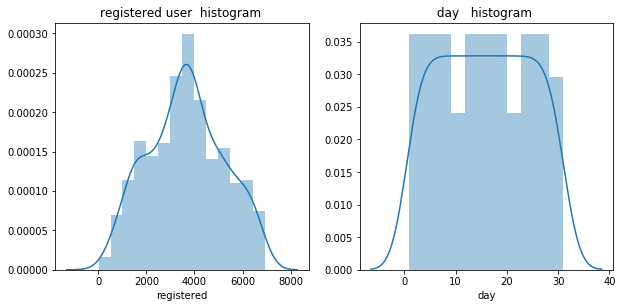

In [49]:
# ploting distribution plot 
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.distplot(data.registered, bins='auto')
plt.title("registered user  histogram ")

plt.subplot(222)
sns.distplot(data.day, bins='auto')
plt.title(" day   histogram  ")

plt.show()


In [50]:
#most of the distribution are not normal 

#humidity and wind speed is some what normal

numeric_var =['temp' ,'hum','windspeed','casual','registered'  ,'day']


#Nomalisation
for i in numeric_var:
    print(i)
    data[i] = (data[i] - min(data[i]))/(max(data[i]) - min(data[i]))


temp
hum
windspeed
casual
registered
day


In [51]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,
2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2.0,0.355170,0.767981,0.388102,0.145833,0.091539,985.0,0.000000
2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.379232,0.615202,0.635752,0.057181,0.093849,801.0,0.033333
2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.171000,0.254904,0.635105,0.052305,0.174560,1349.0,0.066667
2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.175530,0.468123,0.387681,0.046986,0.207046,1562.0,0.100000
2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.209120,0.254464,0.462471,0.035461,0.216286,1600.0,0.133333


In [52]:
data.dtypes

season        float64
yr            float64
mnth          float64
holiday       float64
weekday       float64
workingday    float64
weathersit    float64
temp          float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
day           float64
dtype: object

In [53]:
#Model development 

# Decision tree 
# Random forest 
# Linear regression 
# Knn 

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree.export import export_text

# Decision tree
#r2 score = 98.8% on test data 
#r2 score = 99.9% on train data 
#mape score =16.81 % on test data 
#mape score =0.27%  on train data 
#accuracy  = 84.20% on test data 
#accuracy =99.3 % on train data 

In [55]:
# test train split 
x_var=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'day']

y=data['cnt']
x=data[x_var]
x_train ,x_test,y_train ,y_test =train_test_split(x,y , test_size=0.2, random_state=42)

In [56]:
#Decision Tree model 
dtmodel = DecisionTreeRegressor(max_depth=10).fit(x_train,y_train)

In [57]:
dotfile= open('pt.dot','w')
tree.export_graphviz(dtmodel,out_file =dotfile,feature_names =x_train.columns)

In [58]:
#r2 score on test data
dtmodel.score(x_test,y_test)

0.988123557600556

In [59]:
# r2 score on train data 
dtmodel.score(x_train,y_train)

0.9998848590729815

In [60]:
# predict test data 
dt_predit = dtmodel.predict(x_test)

In [61]:
# # predict train data 
dt_predit_train = dtmodel.predict(x_train)

In [62]:
#Mean absolute percentage error
def MAPE(act ,pred):
    return np.mean(np.abs((act-pred)/act))*100

In [63]:
#mape test data
MAPE(y_test,dt_predit)

19.027053905481058

In [64]:
#mape train data
MAPE(y_train,dt_predit_train)

0.2725078372697394

# Random forest 
#r2 score = 99.4% on test data 
#r2 score = 99.8% on train data 
#mape score =17.51 % on test data 
#mape score =1.39%  on train data 
#accuracy  = 83.49% on test data 
#accuracy =98.7 % on train data 

In [65]:
from sklearn.ensemble  import  RandomForestRegressor

In [66]:
# Random Forest Regressor model
rf_model =RandomForestRegressor(n_estimators=50).fit(x_train,y_train)

In [67]:
#r2 score on test data
rf_model.score(x_test ,y_test)

0.9968600739220714

In [68]:
#r2 score on train data
rf_model.score(x_train ,y_train)

0.9988129197835675

In [69]:
#predict test data 
predict_test=rf_model.predict(x_test)

In [70]:
#predict train data
predict_train=rf_model.predict(x_train)

In [71]:
#MAPE train data
MAPE(y_train,predict_train)

0.9529733616349811

In [72]:
#MAPE test data
MAPE(y_test,predict_test)


17.331028342695873

# Linear Regression
#MAPE train =1.8%
#MAPE test =2.2%
#R^2 =0.993
#F-statistic: 2732
#Accuracy =98.2 % in train data 
#Accuracy =97.8% in test data 

In [73]:
#converting continous variable to dummy 

categorical_var =["season","yr","mnth","holiday","weekday","workingday","weathersit"]

data_regression=pd.DataFrame()


In [74]:
for i in categorical_var:
    data[i]=data[i].astype("object")

In [75]:
#add continous variable
numeric_var =['temp' ,'hum','windspeed','casual','registered' ,'cnt' ,'day']
data_regression= pd.concat([data_regression,data[numeric_var]] ,axis=1)


In [76]:
data_regression.head()

,temp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,
2011-01-01,0.355170,0.767981,0.388102,0.145833,0.091539,985.0,0.000000
2011-01-02,0.379232,0.615202,0.635752,0.057181,0.093849,801.0,0.033333
2011-01-03,0.171000,0.254904,0.635105,0.052305,0.174560,1349.0,0.066667
2011-01-04,0.175530,0.468123,0.387681,0.046986,0.207046,1562.0,0.100000
2011-01-05,0.209120,0.254464,0.462471,0.035461,0.216286,1600.0,0.133333


In [77]:
#create dummies of categorical variable 
for i in categorical_var:
    temp = pd.get_dummies(data[i],prefix=i)
    data_regression=pd.concat([data_regression,temp],axis=1)

In [78]:
data_regression.head()

,temp,hum,windspeed,casual,registered,cnt,day,season_1.0,season_2.0,season_3.0,...,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,workingday_0.0,workingday_1.0,weathersit_1.0,weathersit_2.0,weathersit_3.0
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01,0.355170,0.767981,0.388102,0.145833,0.091539,985.0,0.000000,1,0,0,...,0,0,0,0,1,1,0,0,1,0
2011-01-02,0.379232,0.615202,0.635752,0.057181,0.093849,801.0,0.033333,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2011-01-03,0.171000,0.254904,0.635105,0.052305,0.174560,1349.0,0.066667,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2011-01-04,0.175530,0.468123,0.387681,0.046986,0.207046,1562.0,0.100000,1,0,0,...,1,0,0,0,0,0,1,1,0,0
2011-01-05,0.209120,0.254464,0.462471,0.035461,0.216286,1600.0,0.133333,1,0,0,...,0,1,0,0,0,0,1,1,0,0


In [79]:
# Regressing dataset dependent variable 

d_r_var =['temp', 'hum', 'windspeed', 'casual', 'registered', 'day',
       'season_1.0', 'season_2.0', 'season_3.0', 'season_4.0', 'yr_0.0',
       'yr_1.0', 'mnth_1.0', 'mnth_2.0', 'mnth_3.0', 'mnth_4.0',
       'mnth_5.0', 'mnth_6.0', 'mnth_7.0', 'mnth_8.0', 'mnth_9.0',
       'mnth_10.0', 'mnth_11.0', 'mnth_12.0', 'holiday_0.0',
       'holiday_1.0', 'weekday_0.0', 'weekday_1.0', 'weekday_2.0',
       'weekday_3.0', 'weekday_4.0', 'weekday_5.0', 'weekday_6.0',
       'workingday_0.0', 'workingday_1.0', 'weathersit_1.0',
       'weathersit_2.0', 'weathersit_3.0']

In [80]:
# train test split
Y= data_regression['cnt']
X=data_regression[d_r_var]

In [81]:
X_train , X_test ,Y_train,Y_test = train_test_split(X,Y ,test_size=0.2, random_state=42)

In [82]:
#shape of dummy variable split in test train
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)

(584, 38)
(147, 38)
(147,)
(584,)


In [83]:

#import libraries for Linear regression
import statsmodels.api as sm


In [84]:
#training linear regresion model
#MAPE test =2.2%
#accuracy test =97.8%
lr_model =sm.OLS(Y_train,X_train).fit()

In [97]:
#predict test data 
predict_test =lr_model.predict(X_test)



0      6606.0
1      1550.0
2      3747.0
3      6041.0
4      7538.0
5      7264.0
6      1605.0
7      2209.0
8      7499.0
9      5743.0
10     1796.0
11     3068.0
12     4891.0
13     5260.0
14     2133.0
15     2471.0
16     2046.0
17     8156.0
18     5362.0
19     2298.0
20     7697.0
21     5463.0
22     5409.0
23     1872.0
24     1807.0
25     5130.0
26     2121.0
27     7436.0
28     3830.0
29     5557.0
        ...  
117    3272.0
118    5923.0
119    2177.0
120    6398.0
121    1817.0
122    3239.0
123    1349.0
124    3867.0
125    5146.0
126    4541.0
127    3368.0
128    2134.0
129    7410.0
130    3331.0
131    3974.0
132    5495.0
133    5319.0
134    5895.0
135    2227.0
136    4367.0
137    7460.0
138    1977.0
139    4266.0
140    4864.0
141    1913.0
142    2132.0
143    4258.0
144    2792.0
145    5180.0
146    3958.0
Name: cnt, Length: 147, dtype: float64

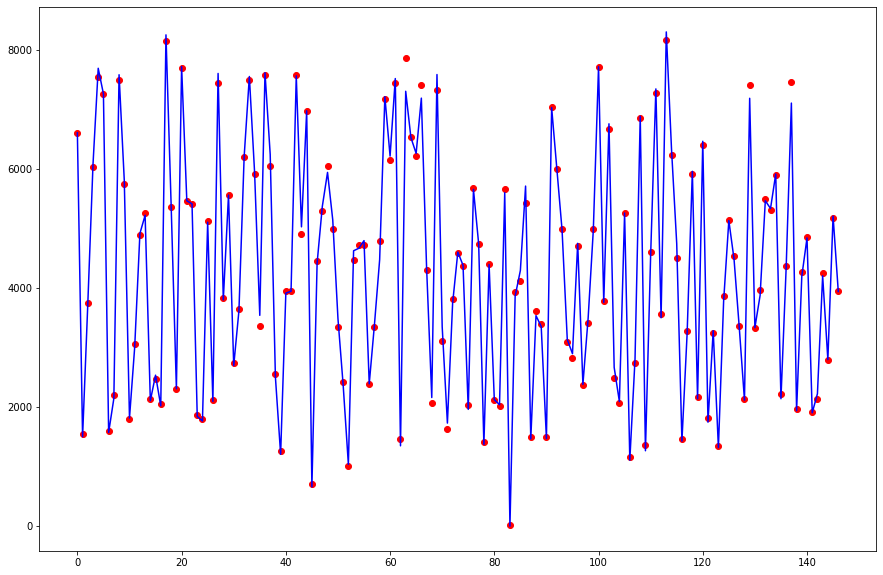

In [110]:
plt.figure(figsize=(15,10))
plt.plot(Y_test.reset_index( drop=True) ,'ro')
plt.plot(predict_test.reset_index(drop=True) ,c='b' )

In [86]:
#predict train data
predict_train =lr_model.predict(X_train)

In [87]:
#mape test 
MAPE(Y_test,predict_test)

2.2874444957990714

In [88]:
# mape train 
MAPE(Y_train,predict_train)

1.8353853017174626

In [89]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2732.
Date:                Wed, 24 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:04:24   Log-Likelihood:                -3780.6
No. Observations:                 584   AIC:                             7623.
Df Residuals:                     553   BIC:                             7759.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
temp              23.4948     86.662      0.271      0.786    -146.731     193.721
hum              -87.6596     52.233     -1.678      0.094    -190.259      14.940
windspeed         41.3394     37.466      1.103      0.270     -32.254     114.933
casual          2540.3383     55.275     45.958      0.000    2431.763    2648.914
registered      6926.5317     81.087     85.421      0.000    6767.255    7085.808
day               14.7226     23.051      0.639      0.523     -30.555      60.000
season_1.0         1.8965     30.353      0.062      0.950     -57.726      61.518
season_2.0        19.1579     28.896      0.663      0.508     -37.601      75.917
season_3.0       -31.6471     30.009     -1.055      0.292     -90.592      27.298
season_4.0         1.7813     33.043      0.054      0.957     -63.123      66.686
yr_0.0           -16.3191     15.010     -1.087      0.277     -45.804      13.165
yr_1.0             7.5076     20.869      0.360      0.719     -33.484      48.499
mnth_1.0          32.2816     41.689      0.774      0.439     -49.607     114.170
mnth_2.0          23.6962     40.109      0.591      0.555     -55.088     102.480
mnth_3.0          16.6459     31.818      0.523      0.601     -45.854      79.146
mnth_4.0         -50.7964     36.429     -1.394      0.164    -122.353      20.761
mnth_5.0         -16.5717     38.024     -0.436      0.663     -91.261      58.117
mnth_6.0         -21.2458     36.112     -0.588      0.557     -92.179      49.688
mnth_7.0         -30.4612     42.706     -0.713      0.476    -114.347      53.425
mnth_8.0         -44.1315     40.535     -1.089      0.277    -123.753      35.490
mnth_9.0          90.8480     32.588      2.788      0.005      26.837     154.859
mnth_10.0         -6.7511     37.084     -0.182      0.856     -79.594      66.092
mnth_11.0        -18.1815     39.846     -0.456      0.648     -96.449      60.086
mnth_12.0         15.8562     35.344      0.449      0.654     -53.569      85.281
holiday_0.0        2.2879     19.923      0.115      0.909     -36.846      41.422
holiday_1.0      -11.0994     24.531     -0.452      0.651     -59.285      37.087
weekday_0.0      -34.3096     14.736     -2.328      0.020     -63.254      -5.365
weekday_1.0       -2.5072     17.165     -0.146      0.884     -36.224      31.210
weekday_2.0       -1.1328     17.903     -0.063      0.950     -36.299      34.033
weekday_3.0        1.3483     18.618      0.072      0.942     -35.222      37.919
weekday_4.0       -8.6300     17.338     -0.498      0.619     -42.686      25.426
weekday_5.0      -14.9637     18.040     -0.829      0.407     -50.399      20.472
weekday_6.0       51.3836     14.871      3.455      0.001      22.174      80.593
workingday_0.0     5.9747     18.827      0.317      0.751     -31.006      42.956
workingday_1

# Overall Linear regression is best model compared to others 
# Linear regression gives best accuracy and low error rate 
# Accuracy =97.8% in test data 
# MAPE test =2.2%